# Data Loading

In [15]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis (EDA)

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Preprocessing

In [18]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)

In [19]:
# Encode Categorical Variables using one hot encoder
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [20]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Model Building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target variable
X = data.drop(columns='Survived')
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predict and evaluate logistic regression model
y_pred_logreg = logreg.predict(X_test)
logreg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg)
}

# Predict and evaluate random forest model
y_pred_rf = rf.predict(X_test)
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# Model Evaluation and Selection

In [23]:

# Print metrics
report = f"""
Model Evaluation Report:

Logistic Regression:
- Accuracy: {logreg_metrics['Accuracy']}
- Precision: {logreg_metrics['Precision']}
- Recall: {logreg_metrics['Recall']}
- F1 Score: {logreg_metrics['F1 Score']}

Random Forest:
- Accuracy: {rf_metrics['Accuracy']}
- Precision: {rf_metrics['Precision']}
- Recall: {rf_metrics['Recall']}
- F1 Score: {rf_metrics['F1 Score']}
"""

print(report)


Model Evaluation Report:

Logistic Regression:
- Accuracy: 0.8100558659217877
- Precision: 0.7857142857142857
- Recall: 0.7432432432432432
- F1 Score: 0.7638888888888888

Random Forest:
- Accuracy: 0.8212290502793296
- Precision: 0.8
- Recall: 0.7567567567567568
- F1 Score: 0.7777777777777778



In [24]:
# Feature importances for random forest
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


            Importance
Sex_male      0.273316
Fare          0.272058
Age           0.252745
Pclass        0.078616
SibSp         0.052192
Parch         0.038490
Embarked_S    0.023095
Embarked_Q    0.009488


In [25]:
import joblib

# Save the trained model
joblib.dump(rf, 'random_forest_base_model.pkl')

# Load the model 
rf = joblib.load('random_forest_base_model.pkl')


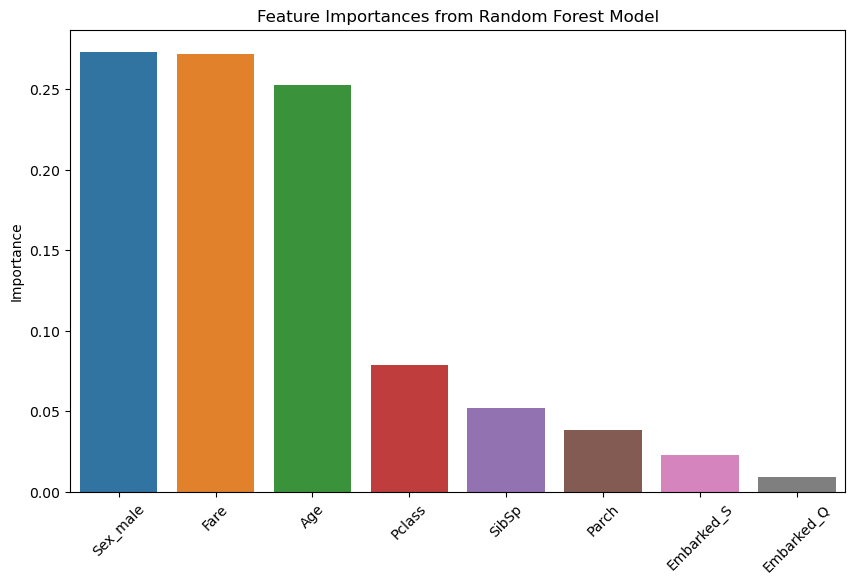

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importances from Random Forest Model')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering 

In [31]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Create new feature 'FamilySize'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Create new feature 'IsAlone'
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# Extract titles from names
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Replace rare titles with 'Rare' and group similar titles
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Create age bins
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# Calculate fare per person
data['FarePerPerson'] = data['Fare'] / data['FamilySize']


In [32]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# 'Cabin' column typically has many missing values, so we can drop it or create a feature indicating whether a cabin was recorded
data['Has_Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Title', 'AgeBin'], drop_first=True)

# Drop columns that are not useful for prediction
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [33]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns='Survived')
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8268156424581006
Precision: 0.7866666666666666
Recall: 0.7972972972972973
F1 Score: 0.7919463087248321


### We performed feature engineering, data preprocessing, (re)trained and (re)evaluated a Random Forest classification model. We notice that after feature Engineering to get a better Acuuracy compared to the initial model